In [174]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

X = np.arange(-100,100,4)
y = X + 10

#crating array from range and checking length
len(X)

50

In [175]:
X = np.arange(-100,100,4)
y = X + 10

#crating array from range and checking length
len(X)

50

In [176]:
#Spliting the array fro testing and training

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

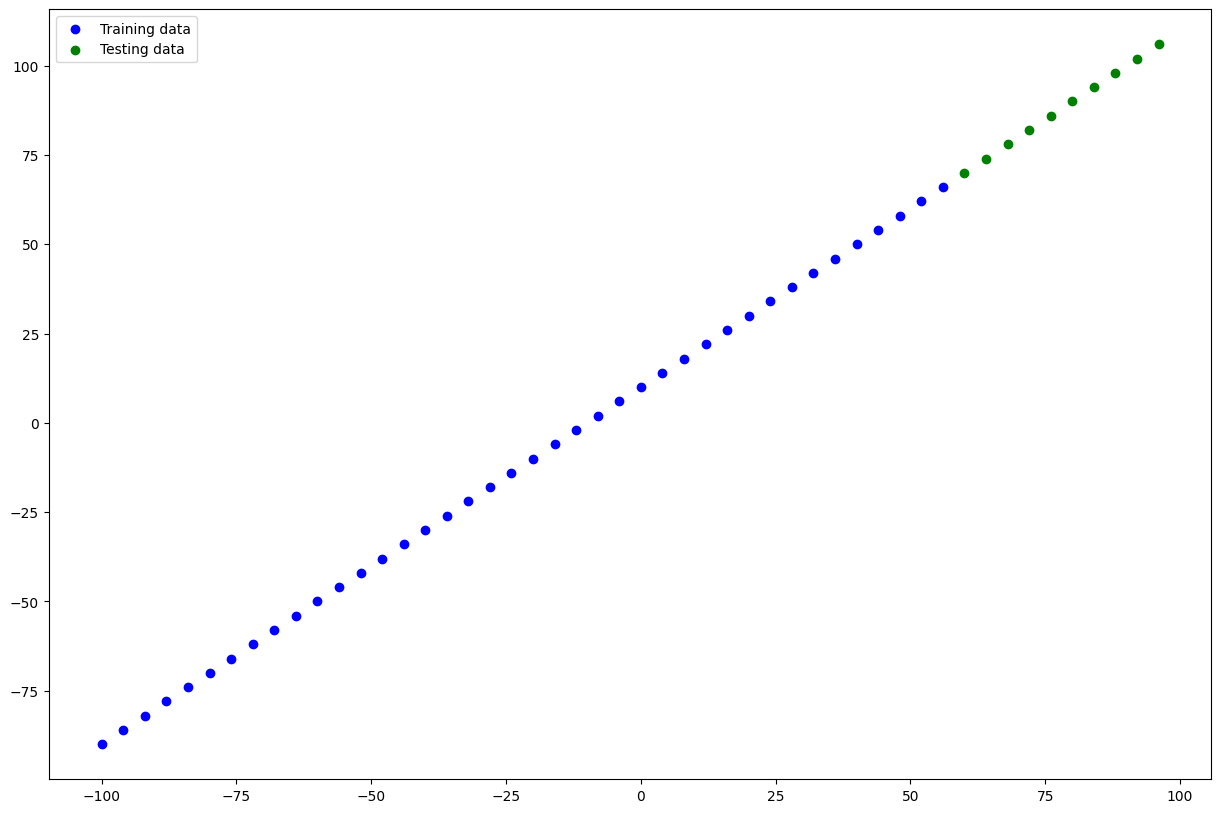

In [177]:
#Visualizing the data

plt.figure(figsize=(15,10))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [178]:
tf.random.set_seed(42)

#Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model for summary
])

#Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Summaery
model.summary()


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [179]:
#Fit

#model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 68.9834 - mae: 68.9834
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 33.7977 - mae: 33.7977
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2835 - mae: 9.2835
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3047 - mae: 11.3047
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.5482 - mae: 12.5482
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.7092 - mae: 9.7092
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8060 - mae: 8.8060
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0818 - mae: 9.0818
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 19.3070 - mae: 19.3070
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.4363 - mae: 10.4363
Epoch 11/100
2/2 [==============================] - 0s 8ms/step 

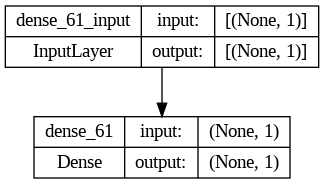

In [180]:
plot_model(model, show_shapes=True)

In [181]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 66ms/step


array([[51.62584 ],
       [54.980854],
       [58.33587 ],
       [61.690884],
       [65.0459  ],
       [68.40091 ],
       [71.75592 ],
       [75.11094 ],
       [78.46595 ],
       [81.82096 ]], dtype=float32)

In [182]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):

  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

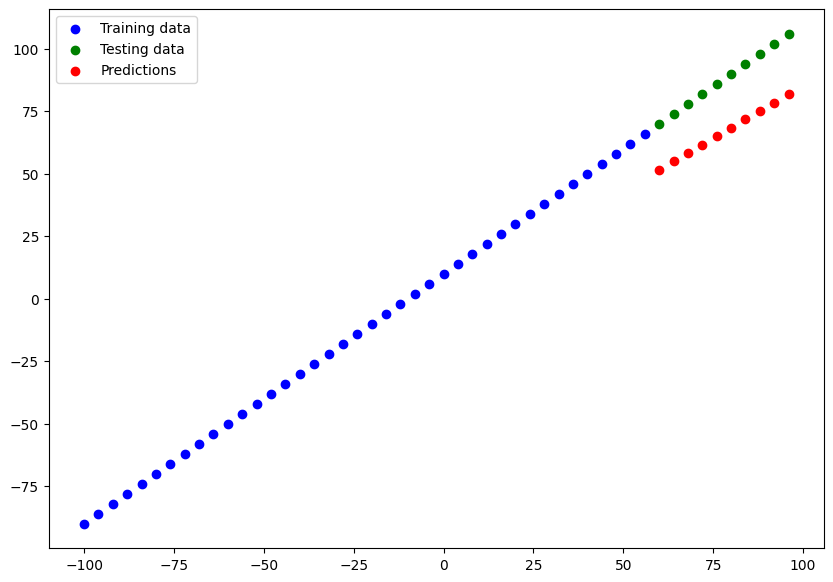

In [183]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [184]:
# Evaluate the model on the test set
# Since we used MAE for the loss function as well as MAE for the metrics
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 21.2766 - mae: 21.2766


[21.27659797668457, 21.27659797668457]

In [185]:
#y_pred is not the same shape as y_test and tf.metrics.mean_absolute_error so it gives an array
#we fix it with squeeze
y_preds.shape,y_test.shape

((10, 1), (10,))

In [186]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape

mae_1 = mae.numpy()

mae.numpy()

21.276598

In [187]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())

mse_1 = mse.numpy()

mse.numpy()

456.12567

In [188]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred.squeeze()).numpy()


In [189]:
def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred.squeeze()).numpy()

# Try to improve the model with more
Model 2

In [190]:
tf.random.set_seed(42)

# Create model 2
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile model 2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit model 2
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 41.2929 - mae: 41.2929
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 17.9238 - mae: 17.9238
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 14.9618 - mae: 14.9618
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 15.0349 - mae: 15.0349
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.5700 - mae: 14.5700
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 11.5995 - mae: 11.5995
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9481 - mae: 10.9481
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9890 - mae: 10.9890
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 39.5173 - mae: 39.5173
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.0379 - mae: 27.0379
Epoch 11/100
2/2 [==============================] - 0s 6m

1/1 [==============================] - 0s 54ms/step


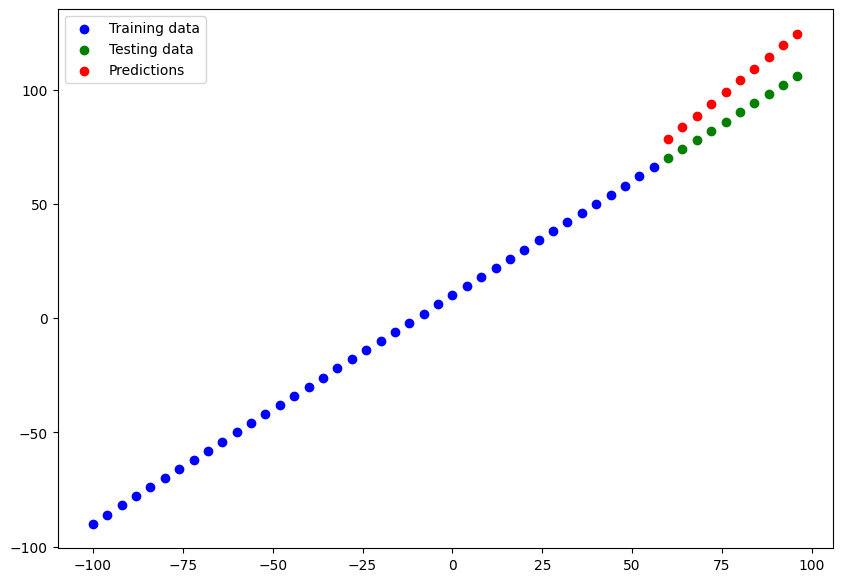

In [191]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [192]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(13.437693, 190.72305)

Model 3

In [193]:
tf.random.set_seed(42)

# Create model 3
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile model 3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit model 3
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 61.1622 - mae: 61.1622
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 28.0208 - mae: 28.0208
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 16.6985 - mae: 16.6985
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 12.5810 - mae: 12.5810
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 13.6428 - mae: 13.6428
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 10.9286 - mae: 10.9286
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8729 - mae: 11.8729
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 10.7658 - mae: 10.7658
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 36.5485 - mae: 36.5485
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 24.3622 - mae: 24.3622
Epoch 11/500
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 119ms/step


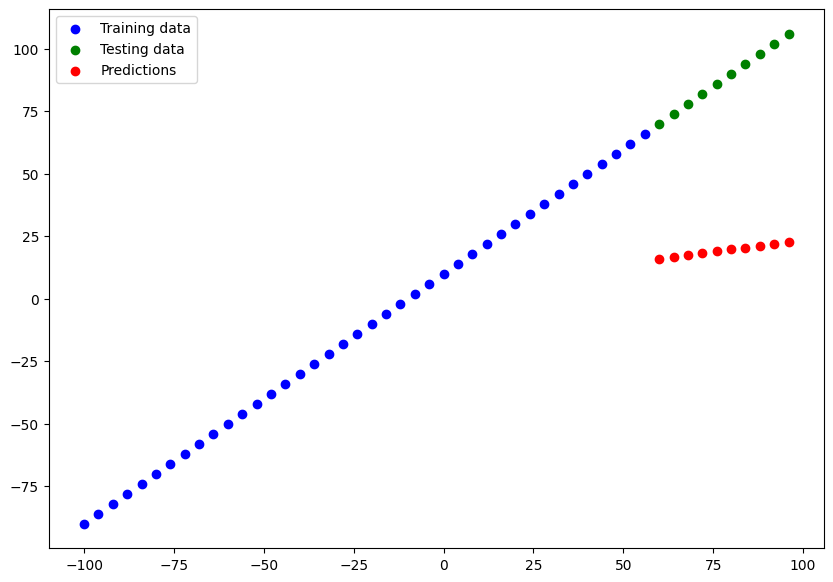

In [194]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [195]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(68.65061, 4799.4575)

Model 4

In [204]:
tf.random.set_seed(42)

# Create model 4
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(400),
  tf.keras.layers.Dense(1)
])

# Compile model 4
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=['mae'])

# Fit model 4
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 11ms/step - loss: 42.0197 - mae: 42.0197
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 39.4397 - mae: 39.4397
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 36.9606 - mae: 36.9606
Epoch 4/200
2/2 [==============================] - 0s 7ms/step - loss: 34.4021 - mae: 34.4021
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 31.9138 - mae: 31.9138
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 29.4015 - mae: 29.4015
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 26.8010 - mae: 26.8010
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 24.1162 - mae: 24.1162
Epoch 9/200
2/2 [==============================] - 0s 9ms/step - loss: 21.5968 - mae: 21.5968
Epoch 10/200
2/2 [==============================] - 0s 9ms/step - loss: 19.0649 - mae: 19.0649
Epoch 11/200
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 79ms/step


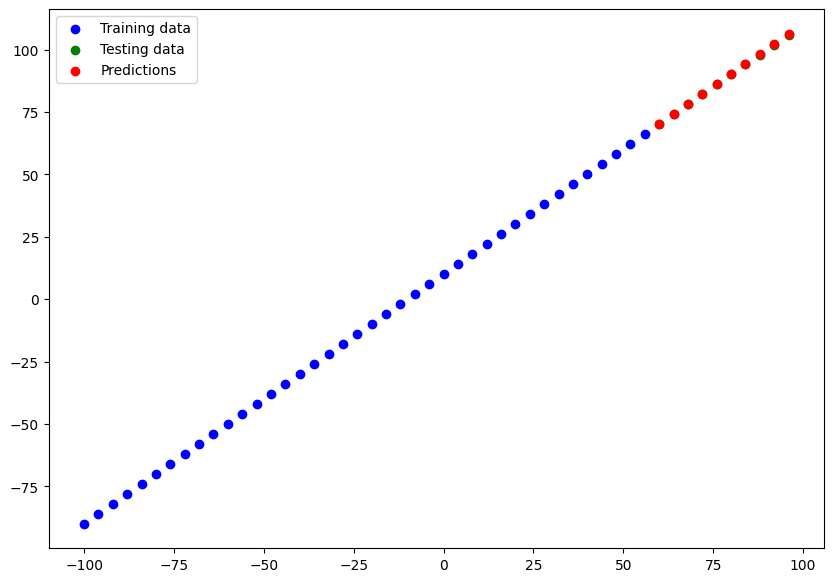

In [205]:
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [198]:
mae_4 = mae(y_test, y_preds_4)
mse_4 = mse(y_test, y_preds_4)
mae_4, mse_4

(0.13636093, 0.019021334)

# Compare

In [206]:
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3],
                 ["model_4", mae_4, mae_4]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.276598,456.125671
1,model_2,13.437693,190.723053
2,model_3,68.650612,68.650612
3,model_4,0.136361,0.136361
